In [144]:
# %matplotlib notebook

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [146]:
filename='C:\\Users\\Admin\\Desktop\\Data\\A304_MR\\A304_125K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value'])
df['multiplier'] = 10**6
df
(df['V5'],df['V6']) = (df['V6'], df['V5'])
(df['V7'],df['V8']) = (df['V8'], df['V7'])

# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [147]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[["I", "B","B_int","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,10000.404053,10000,124.958531,5225.004729,-5225.768879,4635.066777,-4635.185439,5227.007617,-5226.978527,4635.742023,-4635.623855,-0.000002,1000000
1,0.001,9000.413281,9000,124.999324,5229.024918,-5228.911034,4638.437192,-4638.430791,5229.629996,-5229.634512,4639.020811,-4638.866020,-0.000002,1000000
2,0.001,8000.482642,8000,125.000533,5231.719272,-5231.646817,4641.821225,-4641.741524,5232.321696,-5232.338218,4642.348623,-4642.177232,-0.000002,1000000
3,0.001,7000.380176,7000,125.000540,5234.458221,-5234.399660,4645.184993,-4645.076542,5235.042772,-5235.062699,4645.676799,-4645.530983,-0.000002,1000000
4,0.001,6000.357080,6000,125.000646,5237.211667,-5237.125631,4648.492033,-4648.476333,5237.757496,-5237.861062,4649.024003,-4648.918838,-0.000002,1000000


In [148]:

df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

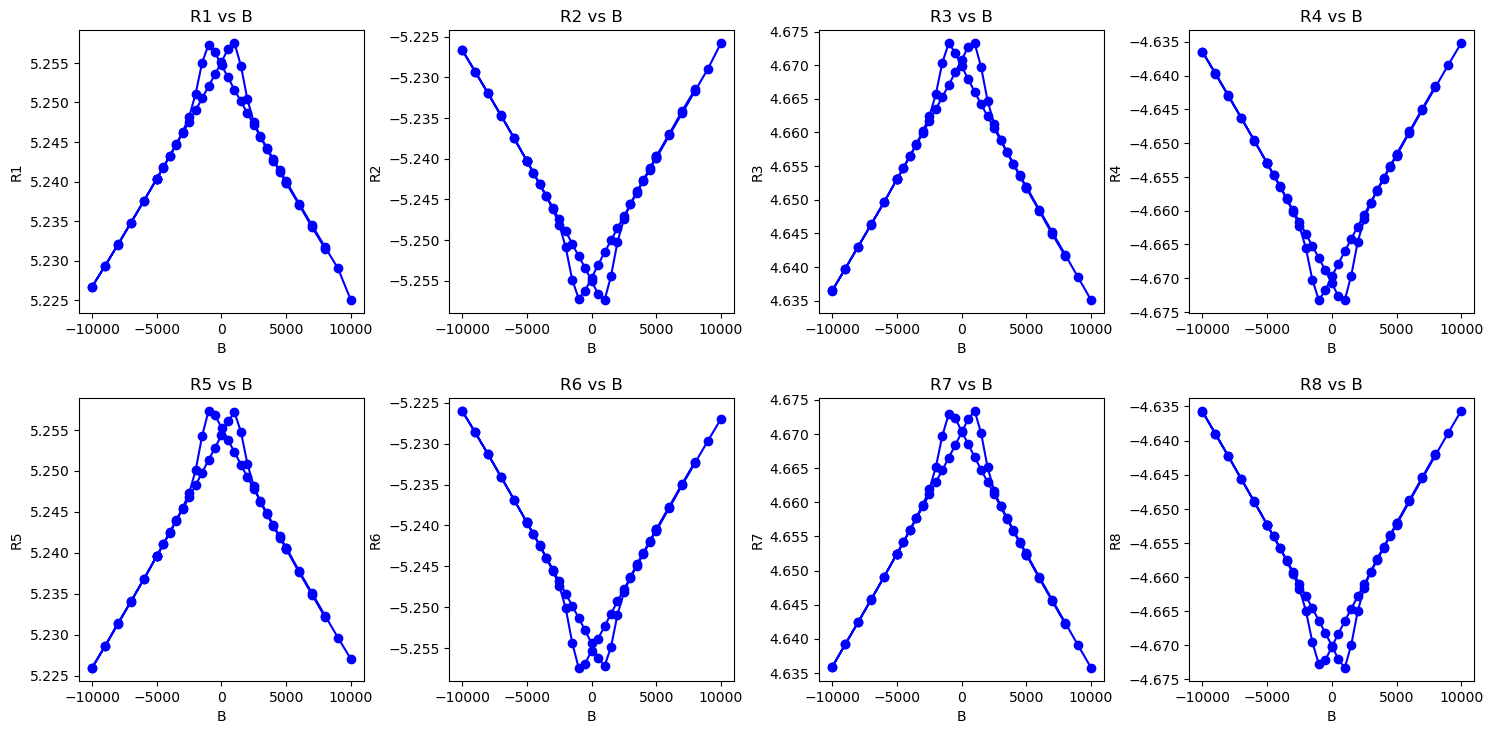

In [149]:
plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(4,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(4,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(4,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(4,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(4,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(4,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(4,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

In [150]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

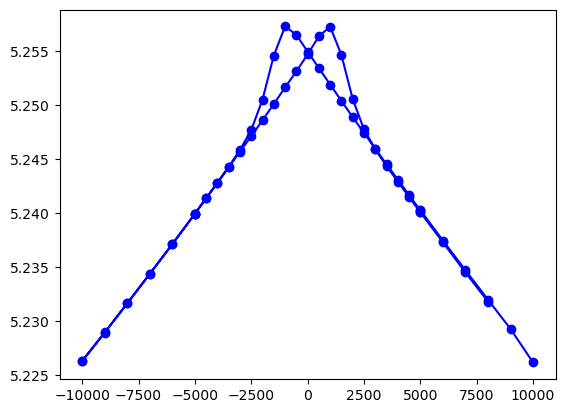

In [151]:
plt.plot(df['B_int'], df['Ra'],'bo-')

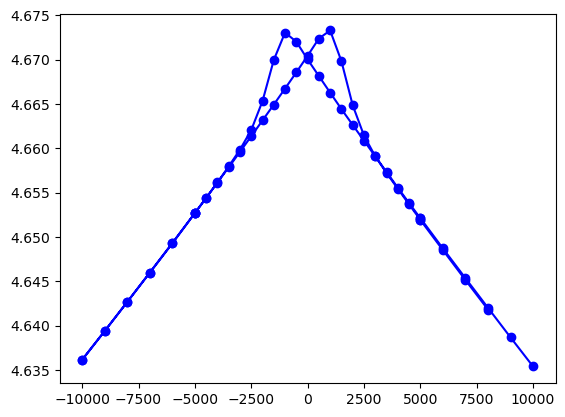

In [152]:
plt.plot(df['B_int'], df['Rb'],'bo-')
plt.show()

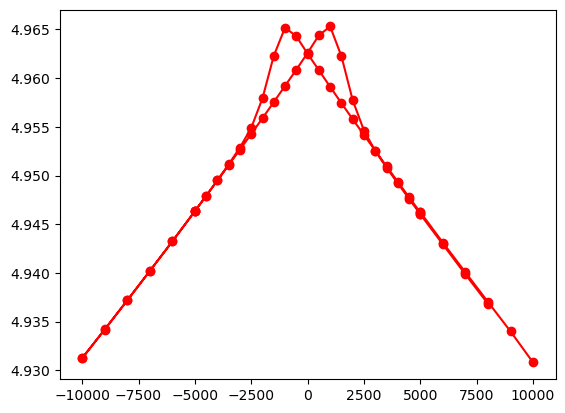

In [153]:
plt.plot(df['B_int'], df['R'], 'ro-')
plt.show()

In [154]:
# df.iloc
# df.loc
R0 = df.loc[df['B_int'] == 0]['R'].mean()
R0

4.962551829997125

In [155]:
df['MR'] = (df['R'] - R0)/R0*100

In [156]:
df[['B_int','MR']].head()

,B_int,MR
0,10000,-0.639884
1,9000,-0.575458
2,8000,-0.514604
3,7000,-0.453350
4,6000,-0.391803


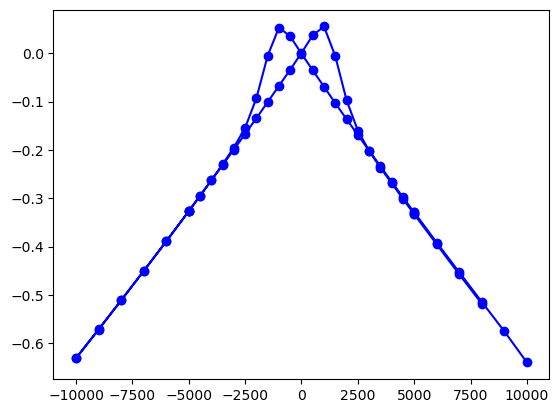

In [157]:
plt.plot(df['B_int'], df['MR'], 'bo-')

In [159]:
df.to_pickle('./pickle_data/MR_125K.pkl')

In [160]:
df.to_csv('./pickle_data/MR_125K.csv')